# Exercise 1

In [1]:
# Add your imports here
%matplotlib inline
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
themes = pd.read_csv(LEGO_DATA_FOLDER + '/themes.csv.zip')
colors = pd.read_csv(LEGO_DATA_FOLDER + '/colors.csv.zip')
inventories = pd.read_csv(LEGO_DATA_FOLDER + '/inventories.csv.zip')
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_parts.csv.zip')
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + '/inventory_sets.csv.zip')
part_categories = pd.read_csv(LEGO_DATA_FOLDER + '/part_categories.csv.zip')
parts = pd.read_csv(LEGO_DATA_FOLDER + '/parts.csv.zip')
sets = pd.read_csv(LEGO_DATA_FOLDER + '/sets.csv.zip')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [5]:
# here we can see all type of inconsistency in the sets' years
sets.year.iloc[[0, 7, 11645, 11643]]

0           70s
7         19788
11645    -20122
11643     -2014
Name: year, dtype: object

In [6]:
# we define a function that deals with every one of those cases
# we assumed the following:
# 70s -> 1970
# negative year -> ignore negative sign
# 20122 -> the two last digits are redundant: remove the last one.
def read_year(year_s):
    try:
        year = int(year_s)
        if year < 0:
            year = -year
        if year > 2018:
            return read_year(year_s[:-1])
        else:
            return year
    except ValueError:
        return 1900 + read_year(year_s[:-1])
    
year_clean = sets.year.apply(read_year)

# as the resulted type is integers (-> no NAN values) and the range is reasonnable, data is coherent 
print('year type:', year_clean.dtype)
print('year min:', year_clean.min())
print('year max:', year_clean.max())

year type: int64
year min: 1950
year max: 2017


In [7]:
# there is only one kind of inconsistency in the inventory parts quantities
print(inventory_parts.quantity.iloc[[9]])

9   -inf
Name: quantity, dtype: float64


In [8]:
# to deal with those, we define a function that returns quantities as integers
# a reasonable default value on inconsistency is 0
def read_quantity(quantity):
    return 0 if quantity == float('-inf') else int(quantity)

quantity_clean = inventory_parts.quantity.apply(read_quantity)

# applying that function leads to no NAN values and the given mean
print('number of NAN values:', quantity_clean.map(np.isnan).sum())
print('parts quantity mean:', quantity_clean.mean())

number of NAN values: 0
parts quantity mean: 2.7670542575540584


### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [9]:
### Task A3.1: ids of the inventories that belong to sets that contain cars.
# We had to spot all car related keywords and brands used in the sets' names.
car_keywords = ['car', 'truck', 'Rolls-Royce' , 'Cadillac' , 'Renault' , 'Ford' , 'Berlinetta' , 'Audi' , 'Chevrolet' , 'Ferrari' , 'Lamborghini' , 'McLaren' , 'Mercedes' , 'Porsche' , 'VW' ]

# Based on those we discriminated car sets with the following method
# We remain careful about the case of strings by systematically lowering them.
car_keywords = list(map(lambda s: s.lower(), car_keywords))
def car(s):
    s = s.lower()
    for keyword in car_keywords:
        if(keyword in s):
            return True
    return False

# we then merge the filtered sets with the inventories and print the unique resulting inventoriy ids.
pd.merge(sets[sets.name.apply(car)], inventory_sets, left_on='id', right_on='set_id').inventory_id.unique()

array([13941, 10158, 13083,  5358, 13380,  8202, 12137, 10770, 10995,
        4536, 16131,  1716,  3755, 10406, 10993,  1645, 14174,  7430,
        9709, 14711, 12851, 10515, 14919,  2814, 15010, 16138,  5904,
        7151, 11966,  8140,  1726,  2643,  6066,  1649,  6530, 14011,
        2677,  5491,  2917,  6086, 10421, 16159,  9329, 11759,  1899,
        2849,  4643,  1371, 13427,  2836,  8950,   528, 14493,  9210,
         908,  2636, 11050, 11190,  9033,  1732,  3764,  1401,  4430,
        5110,  9178, 13355,  2559,  6296, 10028, 12110,  1205,  1418,
        3109,  4261,  4969,  5857, 11861, 15192, 15694, 13696,  7363,
        5432,  4051,  8820,   263,  5600,    35, 11935,  9426,  7881,
        9599, 10043, 16023, 16034,  9502, 13370, 14328, 14931,  4187,
       13398,  6702,  8348,  9406, 14154,  4278,   962,  6276, 11436,
        1334,  3435,  8331,  3699,  8980,  4832,  9381, 12830, 12437,
        4467,  2258,  8585,   500,  2114], dtype=int64)

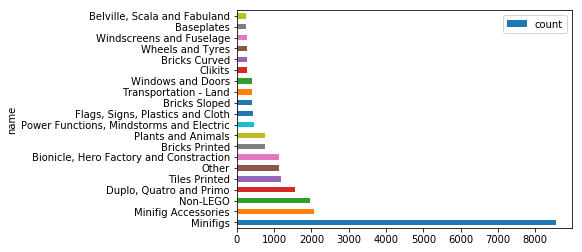

In [10]:
### Task A3.2: distribution of part categories
# get the count of parts for a category id
df = parts.groupby('part_cat_id').size().to_frame('count').reset_index('part_cat_id')
# keep the 20 largest
df = df.sort_values('count', ascending=False).head(20)
# merge with catogory name
df = pd.merge(df, part_categories, left_on='part_cat_id', right_on='id')
# plot the chart
df.plot.barh(x='name', y='count')

In [11]:
# define function to get actual (r,g,b) values from hex value
# this function is needed for Task A3.3 and A3.4.
def hex_to_rgb(hex):
    return tuple(int(hex[i:i+2], 16)/255 for i in (0, 2 ,4))

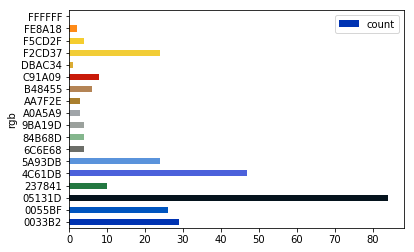

In [12]:
### Task A3.3.a: Find the dominant color of each set. 
# as the definition of what a 'dominant color' is isn't given, we'll assume the following:
# it is the color that hast the most number of parts with that color.
# so we'll need to compute, for each set, the number of parts wich each colors and take the one that is the more represented.
# get cleaned inventory_parts (after Task A2)
df = inventory_parts.copy().drop('quantity', axis='columns')
df['inventory_quantity'] = quantity_clean
# merge that with parts and keep only the needed columns
df = pd.merge(inventory_sets, df, on='inventory_id').drop(['is_spare', 'inventory_id', 'part_id'], axis='columns')
# compute the total number of parts and drop unnecessary columns
df['part_quantity'] = df.quantity * df.inventory_quantity
df.drop(['inventory_quantity', 'quantity'], axis='columns', inplace=True)
# get the best colors 
df = df.groupby(['set_id', 'color_id'])['part_quantity'].sum().reset_index()
df.iloc[df.groupby('set_id')['part_quantity'].idxmax()]
# merge with colors to get actual colors name and rgb
set_colors = pd.merge(df, colors, left_on='color_id', right_on='id')[['set_id', 'name', 'rgb']]

### Task A3.3.b Plot the number of sets per dominant color. Color each bar with the respective color that it represents.
# get the cout of set per color
df = set_colors.groupby('rgb').size().to_frame('count').reset_index('rgb')
# plot it
df.plot(kind='barh', x='rgb', y='count', color=map(lambda c: (hex_to_rgb(c)), df['rgb']))

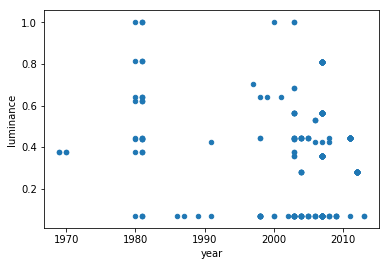

In [13]:
### Task A3.4: luminance* of the sets vs their publishing year
# define the luminance function
def luminance(hex):
    r,g,b = hex_to_rgb(hex)
    return np.sqrt(0.299*r*r + 0.587*g*g + 0.114*b*b)

# get cleaned year with associated color via set ids
df = sets.copy()[['id']]
df['year'] = year_clean
df = pd.merge(df, set_colors, left_on='id', right_on='set_id')

# compute luminance
df['luminance'] = df.rgb.map(luminance)

# plot it
df.plot.scatter(x='year', y='luminance')
# we can observe that the luminance as well as the number of set published per year is going down for the last 20 years